In [87]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [88]:
# Load sms-spam data
data = pd.read_csv('sample_data/spam.csv', encoding = 'latin-1')
data = data.iloc[:, :2]

In [89]:
# Preprocessing
data['label'] = data['v1'].apply(lambda x: 1 if x == 'spam' else 0)
X = data['v2']
y = data['label']
# Use count vectorizer (maybe try tfidf vectorizer to see if it performs better)

In [90]:
# Use both Count and Tf-idf
cv = CountVectorizer()
X_cv = cv.fit_transform(X)
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

In [91]:
# Split into 2 sets: Count and tf-idf
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_cv, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#### Distribution and Description

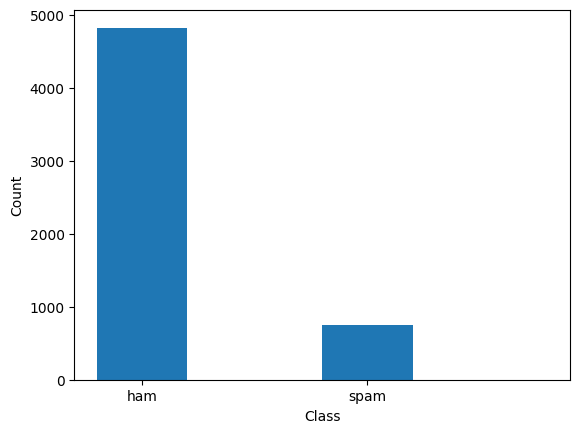

In [92]:

# Plot the distribution of the target classes
plt.hist(data['v1'], bins=2, width=.2, align='right')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([.35, .85], ['ham', 'spam'])
plt.show()

The dataset contains over 5000 SMS messages which are either spam or "ham" as shown in the distribution above. Messages that are "ham" are simply not spam. The model should be able to predict which messages are spam and which are "ham" or not spam based on the message. It should be able to analyze frequent words that appear across spam messages and use that to identify new spam messages.

#### Naive Bayes

In [93]:
# Train and test
nb_classifier = MultinomialNB()
# Count
nb_classifier.fit(X_train_count, y_train_count)
nb_predictions = nb_classifier.predict(X_test_count)
print("Naive Bayes using counts:\n", classification_report(y_test_count, nb_predictions))
# Tf-idf
nb_classifier.fit(X_train_tfidf, y_train_tfidf)
nb_predictions = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes using tf-idf:\n", classification_report(y_test_tfidf, nb_predictions))

Naive Bayes using counts:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Naive Bayes using tf-idf:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#### Logistic Regression

In [94]:
# Train and test
lr_classifier = LogisticRegression()
# Count
lr_classifier.fit(X_train_count, y_train_count)
lr_predictions = lr_classifier.predict(X_test_count)
print("Logistic Regression using counts:\n", classification_report(y_test_count, lr_predictions))
# Tf-idf
lr_classifier.fit(X_train_tfidf, y_train_tfidf)
lr_predictions = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression using tf-idf:\n", classification_report(y_test_tfidf, lr_predictions))

Logistic Regression using counts:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Logistic Regression using tf-idf:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#### Neural Networks


In [ ]:
# Train and Test
nn_classifier = MLPClassifier(hidden_layer_sizes=(30, 8))
# Count
nn_classifier.fit(X_train_count, y_train_count)
nn_predictions = nn_classifier.predict(X_test_count)
print("Neural Networks using counts:\n", classification_report(y_test_count, nn_predictions))
# Count
nn_classifier.fit(X_train_tfidf, y_train_tfidf)
nn_predictions = nn_classifier.predict(X_test_tfidf)
print("Neural Networks using tf-idf:\n", classification_report(y_test_tfidf, nn_predictions))

### Summary & Analysis
Overall, all the models achieved high accuracy with the dataset. All of the models (Multinomial Naive Bayes, Logistic Regression, and Multilayer perceptron) performed over 95% accuracy on the dataset. My explanation for this high accuracy is that spam falls into very predictable patterns, so it is easy for the models to identify spam messages.

### Modifications to models
I wanted to see how the models' performance was affected by the method of vectorization. I compared two vectorizers: Count and Tf-idf. It turned out that the count vectorizer performed slightly better than the tf-idf vectorizer. In general, the count vectorizer is more "simple" and generalized while the tf-idf vectorizer performs better on large datasets by highlighting outliers and rare predictors. Since the SMS dataset was relatively small, it makes sense that the count vectorizer performed better because it is better suited for smaller datasets.
